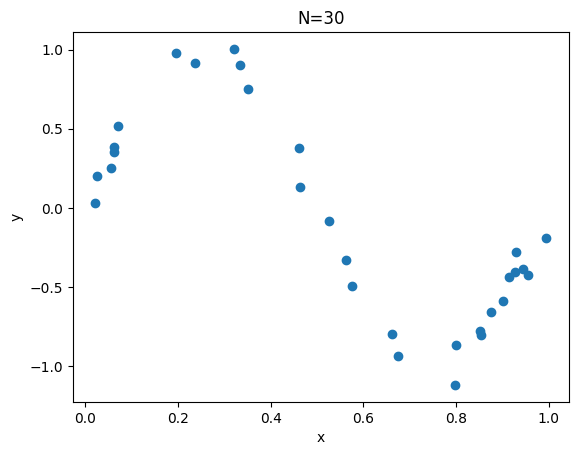

In [11]:
import numpy as np
from matplotlib import pyplot as plt

# Générer les données
N = 30 # nombre de points
x = np.random.uniform(0, 1, size=N)
y = np.sin(2 * np.pi * x) + np.random.normal(scale=.1, size=N)

# visualiser données
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'N={N}')
plt.show()


In [12]:
# convertir données (numpy -> pytorch)
import torch
x, y = torch.tensor(x), torch.tensor(y)

# initialise theta
M = 3
theta = torch.zeros(M + 1, requires_grad = True)

# fonction polynome
def get_predict(x, coefs):
  y_predict = torch.zeros_like(x)
  for i in range(len(theta)):
    y_predict = y_predict + coefs[i] * x**i
  return y_predict

# fonction coût
def get_loss(y_predict):
  return ((y_predict - y)**2).mean()

In [15]:
# descente de gradient
lr = .5 # learning rate
EPOCHS = M * 10000 # nombre d'iterations
for k in range(EPOCHS + 1):
  loss = get_loss(get_predict(x, theta))
  if k % 1000 == 0:
    print("k=%i \t L(x, theta)=%.3e \t lr=%.3e" % (k, loss.item(), lr))
  grad = torch.autograd.grad(loss, theta)[0]
  theta = theta - lr * grad # mise à jour de theta
  if k == EPOCHS - EPOCHS // 10:
      lr /= 10

k=0 	 L(x, theta)=1.425e-02 	 lr=5.000e-01
k=1000 	 L(x, theta)=1.406e-02 	 lr=5.000e-01
k=2000 	 L(x, theta)=1.391e-02 	 lr=5.000e-01
k=3000 	 L(x, theta)=1.378e-02 	 lr=5.000e-01
k=4000 	 L(x, theta)=1.367e-02 	 lr=5.000e-01
k=5000 	 L(x, theta)=1.358e-02 	 lr=5.000e-01
k=6000 	 L(x, theta)=1.350e-02 	 lr=5.000e-01
k=7000 	 L(x, theta)=1.344e-02 	 lr=5.000e-01
k=8000 	 L(x, theta)=1.339e-02 	 lr=5.000e-01
k=9000 	 L(x, theta)=1.334e-02 	 lr=5.000e-01
k=10000 	 L(x, theta)=1.331e-02 	 lr=5.000e-01
k=11000 	 L(x, theta)=1.327e-02 	 lr=5.000e-01
k=12000 	 L(x, theta)=1.325e-02 	 lr=5.000e-01
k=13000 	 L(x, theta)=1.323e-02 	 lr=5.000e-01
k=14000 	 L(x, theta)=1.321e-02 	 lr=5.000e-01
k=15000 	 L(x, theta)=1.320e-02 	 lr=5.000e-01
k=16000 	 L(x, theta)=1.318e-02 	 lr=5.000e-01
k=17000 	 L(x, theta)=1.317e-02 	 lr=5.000e-01
k=18000 	 L(x, theta)=1.316e-02 	 lr=5.000e-01
k=19000 	 L(x, theta)=1.316e-02 	 lr=5.000e-01
k=20000 	 L(x, theta)=1.315e-02 	 lr=5.000e-01
k=21000 	 L(x, theta)=1.31

polynome: -0.183 x^0 + 11.610 x^1 + -33.406 x^2 + 22.126 x^3


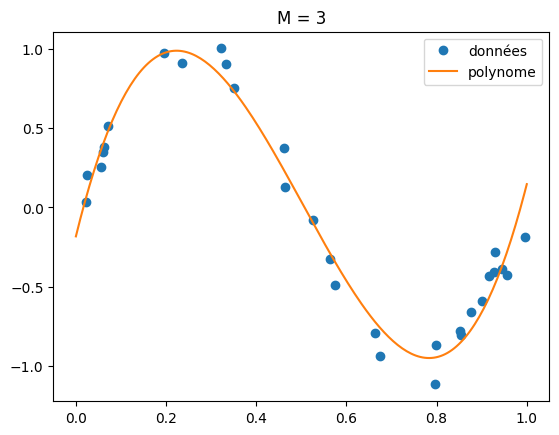

In [16]:
# visualiser résultat
def print_polynome(coefs):
    poly_str = ' + '.join(["%.3f x^%i" % (v, i) for i, v in enumerate(coefs)])
    print("polynome:", poly_str)

print_polynome(theta)

plt.plot(x, y, 'o') # données
x_predict = np.linspace(0, 1, num=200)
y_predict = get_predict(torch.tensor(x_predict), theta.detach())
plt.plot(x_predict, y_predict) # predictions
plt.title('M = %i' % M)
plt.legend(['données', 'polynome'])
